<a href="https://colab.research.google.com/github/luca-heltai/numerical-analysis-2020-2021/blob/master/notebooks/00-scratch-notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def FD(f, x, h):
  return (f(x+h)-f(x))/h

def CFD(f, x, h):
  return (f(x+h)-f(x-h))/(2*h)

def myfun(x):
  return sin(x)

def exact(x):
  return cos(x)

In [3]:
x0 = 1

H = [2**(-i) for i in range(1,75)]
error  = [abs(exact(x0) -  FD(myfun, x0, h)) for h in H]
error2 = [abs(exact(x0) - CFD(myfun, x0, h)) for h in H]

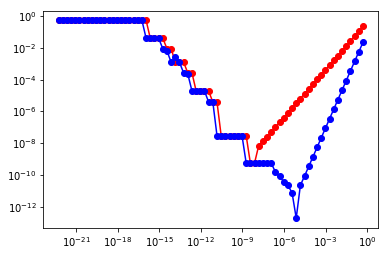

In [4]:
_ = loglog(H, error, 'ro-')
_ = loglog(H, error2, 'bo-')

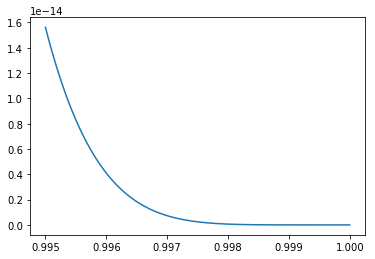

In [5]:
x = linspace(.995, 1,1029)

y = (x-1)**6

_ = plot(x,y)

In [6]:
import sympy as sp
X = sp.var('x')
Y = (1-x)**6
sp.expand(Y)

x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

In [7]:
# Copy from output above.
y = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

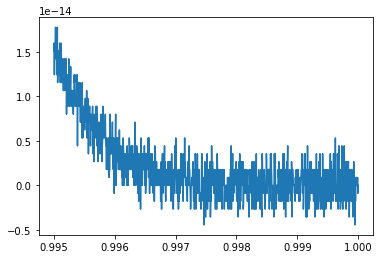

In [8]:
x = linspace(.995, 1,1029)
y = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

_ = plot(x,y)

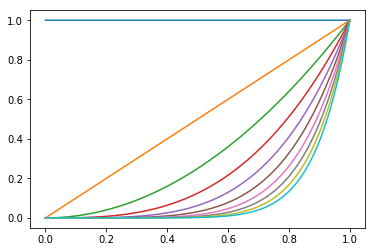

In [9]:
n = 10
m = 1025

# n equispaced points between 0 and 1
x = linspace(0,1,n)

# m equispaced poitns between 0 and 1
x_plot = linspace(0,1,m)

basis_on_xplot = array([x_plot**i for i in range(n)]).T
_ = plot(x_plot, basis_on_xplot)

In [10]:
def u(x):
  """Runge function"""
  return 1.0/(1+50*(x-.5)**2)

def u(x):
  """sin function"""
  return sin(2*pi*x)

In [11]:
# x are interpolation points
# x_plot are plotting points

# Solve linear system with Vandermond Matrix V_ij = v_j(x_i), and right hand side u_i = u(x_i)

uvec = u(x)
van = array([x**i for i in range(n)]).T

from scipy import linalg

In [12]:
p_vec = linalg.solve(van, uvec)

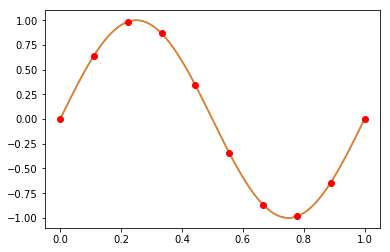

In [13]:
_ = plot(x_plot, u(x_plot))
_ = plot(x_plot, basis_on_xplot.dot(p_vec))
_ = plot(x, uvec, 'or')

In [14]:
# Study the condition number of Vandermond

for n in range(1, 25):
  x = linspace(0,1, n)
  van = array([x**i for i in range(n)]).T
  print("n =", n, ":", cond(van))

n = 1 : 1.0
n = 2 : 2.61803398875
n = 3 : 15.0996577225
n = 4 : 98.8677385072
n = 5 : 686.434941819
n = 6 : 4924.37105661
n = 7 : 36061.1608802
n = 8 : 267816.700908
n = 9 : 2009396.38004
n = 10 : 15193229.6778
n = 11 : 115575244.544
n = 12 : 883478687.072
n = 13 : 6780588492.45
n = 14 : 52214926084.2
n = 15 : 403234616529.0
n = 16 : 3.12165704961e+12
n = 17 : 2.42183660122e+13
n = 18 : 1.88210190873e+14
n = 19 : 1.46730413821e+15
n = 20 : 1.15619383061e+16
n = 21 : 8.40238881702e+16
n = 22 : 7.71210482815e+18
n = 23 : 3.21040781466e+18
n = 24 : 9.7132026039e+18


In [15]:
# Define the Lagrange basis functions
n = 10
x = linspace(0,1, n)


van = ones((m, n))

for i in range(n):
  for j in range(n):
    if j != i:
      van[:,i] *= (x_plot - x[j])/(x[i]-x[j])

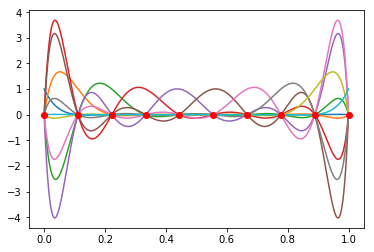

In [16]:
_ = plot(x_plot, van)
_ = plot(x, 0*x, 'or')

In [17]:
Lebesgue = sum(abs(van),axis=1)

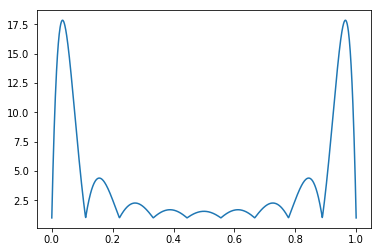

In [18]:
plot(x_plot, Lebesgue)

In [19]:
N = 7
h = 1/(N-1)
x = linspace(0,1,N)

A = zeros((N,N))

for i in range(1,N-1):
    A[i,i] = 2/h
    A[i,i-1] = A[i,i+1] = -1/h
    
A[0,0] = A[-1,-1] = 1

In [20]:
def rhs(x):
    return sin(2*pi*x)

def exact(x):
    return 1/(4*pi*pi)*sin(2*pi*x)

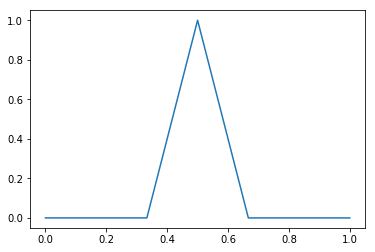

In [21]:
def basis(X, i):
    if X< x[i-1]:
        return 0
    if X > x[i+1]:
        return 0
    else:
        return -abs(x[i]-X)/h+1
    
    
y = zeros((N))
for i in range(N):
    y[i] = basis(x[i], 3)
plot(x, y)

In [22]:
from scipy.integrate import quad
F = zeros((N))

for i in range(1,N-1):
    integrand = lambda X: rhs(X)*basis(X,i)
    F[i] = quad(integrand, 0,1)[0]

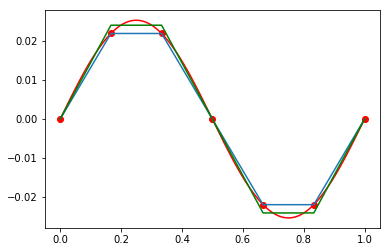

In [24]:
u_fem = linalg.solve(A, F)
u_fd = linalg.solve(A, rhs(x)*h)

xp = linspace(0,1,129)

plot(xp, exact(xp), 'r')
plot(x, exact(x), 'ro')
plot(x, u_fem)
plot(x, u_fd, 'g')